In [1]:
#import pysam
import os.path
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

# Run LFMM 
see R code:

see LEA_analysis.R and LEA_analysis.dom.R for details

# Load LFMM results

In [2]:
lfmm = pd.read_csv(os.path.join('results','batch_4','LFMM','lfmm_results.dom.txt'), sep = '\t')
lfmm = lfmm.rename(columns={'locnum': 'LFMM_ID'})
lfmm.head()
lfmm.shape

(35579, 3)

In [3]:
info = pd.read_csv(os.path.join('results','batch_4','LFMM','info.txt'), sep = '\t')
info.head()

,info,LFMM_ID
0,0.011783,1
1,0.028070,2
2,0.095528,3
3,0.037019,4
4,0.221278,5


In [4]:
ind_info = pd.read_csv(os.path.join('results','batch_4','LFMM','ind_info.txt'), sep = '\t')
ind_info.head()

,ind_info,LFMM_ID
0,0.564877,1
1,0.065788,2
2,0.648206,3
3,0.063434,4
4,0.269665,5


In [5]:
total_info = pd.merge(info, ind_info)
total_info.head()

,info,LFMM_ID,ind_info
0,0.011783,1,0.564877
1,0.028070,2,0.065788
2,0.095528,3,0.648206
3,0.037019,4,0.063434
4,0.221278,5,0.269665


C:\Users\IPSEG\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


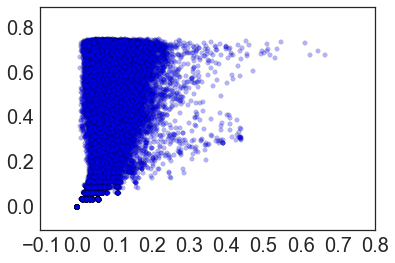

In [6]:
plt.scatter(total_info['info'], total_info['ind_info'], alpha = .3)

In [7]:
lfmm = pd.merge(lfmm, info, how = 'outer')
lfmm.head()

,LFMM_ID,cpvals,zscore,info
0,1,0.514097,-0.547059,0.011783
1,2,0.760482,-0.255597,0.028070
2,3,0.395632,-0.712213,0.095528
3,4,0.948275,-0.054392,0.037019
4,5,0.487917,-0.581565,0.221278


#### Load fake map file - relates domID and LFMM_ID

In [8]:
complete_dom_map = pd.read_csv(os.path.join('results','batch_4','EIGENSOFT','complete.dom.map'),sep = '\t', header = None)
complete_dom_map.columns = ['junkLG', 'domID', 'junk1', 'junk2']
complete_dom_map['stacks_CatID'] = [np.int(x.split('_')[0]) for x in complete_dom_map['domID']]
complete_dom_map['LFMM_ID'] = range(1, len(complete_dom_map)+1)
complete_dom_map.head()

,junkLG,domID,junk1,junk2,stacks_CatID,LFMM_ID
0,1,2_A,1,1,2,1
1,1,2_G,1,1,2,2
2,1,7_GG,1,1,7,3
3,1,7_TA,1,1,7,4
4,1,7_TG,1,1,7,5


In [9]:
lfmm_results = pd.merge(lfmm, complete_dom_map)
lfmm_results = lfmm_results[['LFMM_ID','cpvals','zscore', 'info','domID','stacks_CatID']]
lfmm_results.head()

,LFMM_ID,cpvals,zscore,info,domID,stacks_CatID
0,1,0.514097,-0.547059,0.011783,2_A,2
1,2,0.760482,-0.255597,0.028070,2_G,2
2,3,0.395632,-0.712213,0.095528,7_GG,7
3,4,0.948275,-0.054392,0.037019,7_TA,7
4,5,0.487917,-0.581565,0.221278,7_TG,7


#### Load linkage map

In [11]:
linkage_map = pd.read_csv(os.path.join('linkage_map','LEPmap','with_paralogs','final','PS_chum_map_2015.txt'),sep = '\t')
linkage_map.tail(500)
linkage_map[linkage_map['contig']== 'c48610']

,contig,resolved_locus,stacks_CatID,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM
2493,c48610,48610_A,32975,32975_46,5656,5,12.86,2,124.60
2494,c48610,48610_A,32975,32975_75,5656,5,12.86,2,124.60
2495,c48610,48610_A,32975,32975_82,5656,5,12.86,2,124.60
2496,c48610,48610_A,32975,32975_92,5656,5,12.86,2,124.60
2497,c48610,48610_B,32975,32975_46,5657,5,12.86,2,124.60
2498,c48610,48610_B,32975,32975_75,5657,5,12.86,2,124.60
2499,c48610,48610_B,32975,32975_82,5657,5,12.86,2,124.60
2500,c48610,48610_B,32975,32975_92,5657,5,12.86,2,124.60
2501,c48610,48610_D,32975,32975_46,5658,5,17.10,2,120.36
2502,c48610,48610_D,32975,32975_75,5658,5,17.10,2,120.36


#### Look at the input to lepmap

this locus was not combined across families

## Scored separately across families

In [13]:
lepmap_file = pd.read_csv(os.path.join('linkage_map','LEPmap','with_paralogs','collapsed_loci.lepmap'), sep = '\t')
lepmap_file[['#family','name'] + linkage_map[linkage_map['contig']== 'c48610']['resolved_locus'].drop_duplicates().tolist()].head()

,#family,name,48610_A,48610_B,48610_D,48610_E
0,fam_08,fam_08_Dam,1 1,1 1,1 1,1 1
1,fam_08,fam_08_Sire,1 2,1 2,1 2,1 2
2,fam_08,CMUW10X08H_0002,0 0,0 0,1 1,1 1
3,fam_08,CMUW10X08H_0003,0 0,0 0,0 0,0 0
4,fam_08,CMUW10X08H_0005,0 0,0 0,1 2,1 2


In [14]:
lep_subset = lepmap_file[['#family','name'] + linkage_map[linkage_map['contig']== 'c48610']['resolved_locus'].drop_duplicates().tolist()]
lep_subset.replace('0 0', np.nan ).groupby('#family').count()

,name,48610_A,48610_B,48610_D,48610_E
#family,,,,,
fam_01,36,2,2,2,2
fam_08,177,2,2,139,139
fam_09,33,29,29,2,2


In [15]:
lfmm_results_with_map = pd.merge(lfmm_results, linkage_map, how = 'outer').drop_duplicates(subset = 'domID')
print lfmm_results_with_map.shape
lfmm_results_with_map.head()

(35580, 14)


,LFMM_ID,cpvals,zscore,info,domID,stacks_CatID,contig,resolved_locus,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM
0,1,0.514097,-0.547059,0.011783,2_A,2,c10003,10003_A,2_78,2,19,58.39,5,58.39
1,2,0.760482,-0.255597,0.028070,2_G,2,c10003,10003_A,2_78,2,19,58.39,5,58.39
2,3,0.395632,-0.712213,0.095528,7_GG,7,c1000,1000_C,7_74,3,11,53.54,32,53.54
4,4,0.948275,-0.054392,0.037019,7_TA,7,c1000,1000_C,7_74,3,11,53.54,32,53.54
6,5,0.487917,-0.581565,0.221278,7_TG,7,c1000,1000_C,7_74,3,11,53.54,32,53.54


In [16]:
lfmm_results_with_map = lfmm_results_with_map.dropna(subset=['zscore'])

## determine candidates

In [17]:
import statsmodels.sandbox.stats.multicomp
reject_null, fdr_pval, alphacSidak, alphacBonf = statsmodels.sandbox.stats.multicomp.multipletests(lfmm_results_with_map['cpvals'], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
lfmm_results_with_map['fdr_pval'] = fdr_pval
lfmm_results_with_map['reject_null'] = reject_null
lfmm_results_with_map['mlog10(fdr_pval)_LFMM'] = -np.log10(lfmm_results_with_map['fdr_pval'])
print lfmm_results_with_map['reject_null'].sum()
lfmm_results_with_map.head()

748


,LFMM_ID,cpvals,zscore,info,domID,stacks_CatID,contig,resolved_locus,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM,fdr_pval,reject_null,mlog10(fdr_pval)_LFMM
0,1,0.514097,-0.547059,0.011783,2_A,2,c10003,10003_A,2_78,2,19,58.39,5,58.39,0.999973,False,0.000012
1,2,0.760482,-0.255597,0.028070,2_G,2,c10003,10003_A,2_78,2,19,58.39,5,58.39,0.999973,False,0.000012
2,3,0.395632,-0.712213,0.095528,7_GG,7,c1000,1000_C,7_74,3,11,53.54,32,53.54,0.979034,False,0.009202
4,4,0.948275,-0.054392,0.037019,7_TA,7,c1000,1000_C,7_74,3,11,53.54,32,53.54,0.999973,False,0.000012
6,5,0.487917,-0.581565,0.221278,7_TG,7,c1000,1000_C,7_74,3,11,53.54,32,53.54,0.996818,False,0.001384


In [18]:
fdr_pval

array([ 0.99997252,  0.99997252,  0.97903409, ...,  0.99804521,
        0.99997252,  0.99997252])

## Summary plots

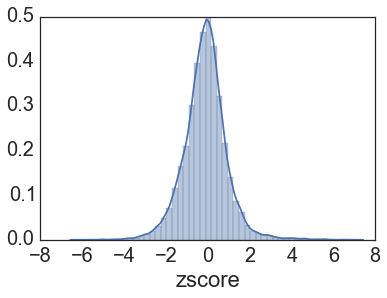

In [19]:
sns.distplot(lfmm_results_with_map['zscore'])
plt.show()

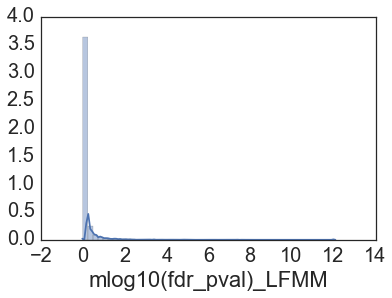

In [20]:
sns.distplot(lfmm_results_with_map['mlog10(fdr_pval)_LFMM'])
plt.show()

## genome scan

In [21]:
mapped_lfmm = lfmm_results_with_map[lfmm_results_with_map['paper1_LG'].notnull()]

In [22]:
cumpos = pd.DataFrame(mapped_lfmm.groupby('paper1_LG')['cM'].max().cumsum())
cumpos.index = cumpos.index+1
cumpos.set_value(1, 'cM', 0)
cumpos = cumpos.sort_index()
cumpos['cM_pad'] = cumpos['cM'] + np.arange(0,750, 20)
cumpos = cumpos[['cM_pad']]
cumpos.head()

,cM_pad
paper1_LG,
1,0.00
2,126.08
3,279.96
4,359.74
5,499.22


In [23]:
genome_stats = pd.merge(mapped_lfmm, cumpos, right_index=True, left_on = 'paper1_LG')
genome_stats['cM_padded'] = genome_stats['cM'] + genome_stats['cM_pad']

genome_stats.tail()

,LFMM_ID,cpvals,zscore,info,domID,stacks_CatID,contig,resolved_locus,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM,fdr_pval,reject_null,mlog10(fdr_pval)_LFMM,cM_pad,cM_padded
57778,35121,0.564129,0.483546,0.253066,67801_AT,67801,c953,953,67801_69,11987,30,0.42,15,0.42,0.999973,False,0.000012,1452.48,1452.90
57972,35256,0.844697,0.164242,0.092331,68268_A,68268,c9758,9758,68268_6,12031,30,19.15,15,19.15,0.999973,False,0.000012,1452.48,1471.63
57973,35257,0.699037,-0.324159,0.066946,68268_T,68268,c9758,9758,68268_6,12031,30,19.15,15,19.15,0.999973,False,0.000012,1452.48,1471.63
57996,35270,0.081779,-1.459270,0.039259,68328_C,68328,c9788,9788,68328_61,12041,30,2.94,15,2.94,0.604314,False,0.218738,1452.48,1455.42
57997,35271,0.099128,-1.382670,0.124676,68328_T,68328,c9788,9788,68328_61,12041,30,2.94,15,2.94,0.650836,False,0.186528,1452.48,1455.42


## flag duplicates

In [24]:
genome_stats['paralog'] = ['_' in xx for xx in genome_stats['resolved_locus']]

In [25]:
genome_stats.sort_values(['paralog', 'mlog10(fdr_pval)_LFMM'], ascending=False)

,LFMM_ID,cpvals,zscore,info,domID,stacks_CatID,contig,resolved_locus,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM,fdr_pval,reject_null,mlog10(fdr_pval)_LFMM,cM_pad,cM_padded,paralog
27767,17394,1.322859e-09,-5.084810,0.104613,32975_TCAC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,0.000001,True,5.999390e+00,126.08,250.68,True
27751,17393,1.882237e-09,-5.037070,0.052539,32975_CTTA,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,0.000001,True,5.881702e+00,126.08,250.68,True
27799,17396,2.665995e-09,-4.989520,0.052539,32975_CCTC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,0.000002,True,5.755341e+00,126.08,250.68,True
27719,17391,3.965623e-09,-4.934750,0.022968,32975_TTAC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,0.000002,True,5.606370e+00,126.08,250.68,True
27815,17397,8.389086e-09,-4.829800,0.136646,32975_CCAC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,0.000005,True,5.288520e+00,126.08,250.68,True
27783,17395,1.257493e-07,-4.431110,0.024297,32975_CTTC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,0.000044,True,4.357901e+00,126.08,250.68,True
27735,17392,2.890013e-07,-4.301610,0.036253,32975_TCAA,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,0.000087,True,4.060839e+00,126.08,250.68,True
27703,17390,3.670629e-07,-4.263720,0.077845,32975_CTAC,32975,c48610,48610_A,32975_46,5656,5,12.86,2,124.60,0.000104,True,3.984436e+00,126.08,250.68,True
33694,20647,1.401971e-06,-4.045250,0.052138,38015_GCTC,38015,c54555,54555_A,38015_32,6858,2,102.30,10,102.30,0.000318,True,3.497967e+00,899.81,1002.11,True
37951,22986,1.789623e-06,4.004260,0.100476,41176_GGT,41176,c58279,58279_A,41176_32,7718,11,103.16,32,103.16,0.000384,True,3.416153e+00,3040.18,3143.34,True


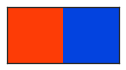

In [26]:
colors = ["red orange", "blue"]
sns.palplot(sns.xkcd_palette(colors))

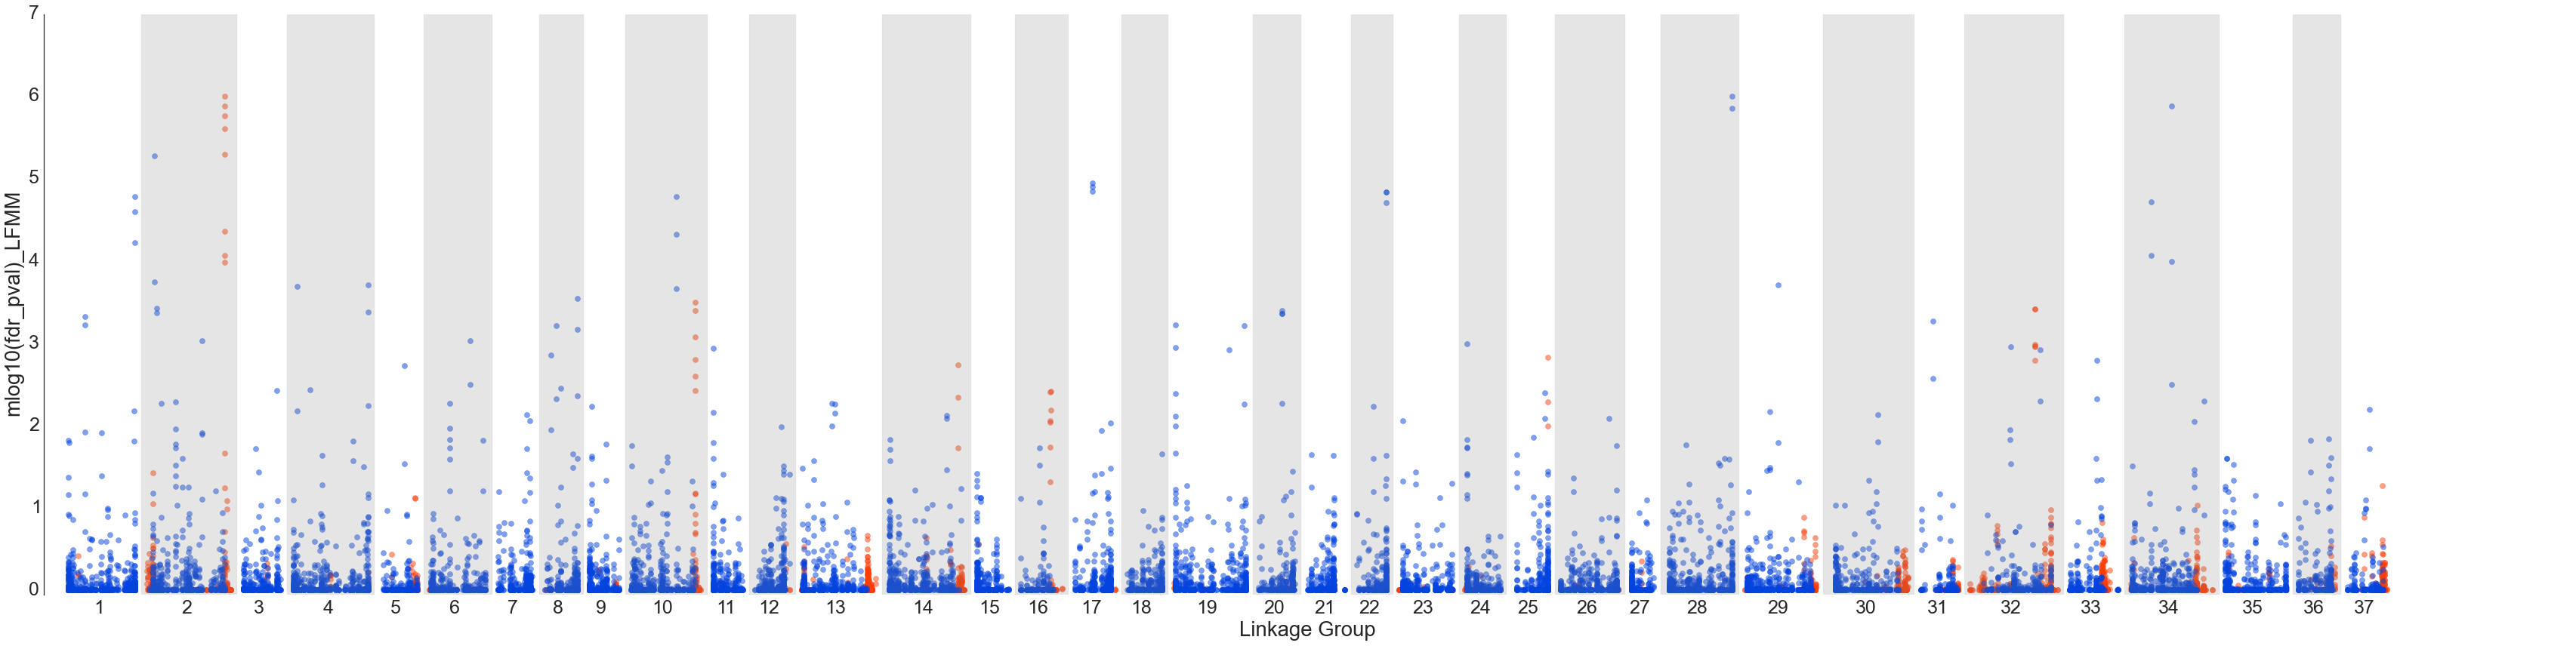

In [27]:
sns.set(font_scale=2.5, style = "white")
stat = 'mlog10(fdr_pval)_LFMM'
kws = dict(s=50, linewidth=.5, alpha = .5)


g = sns.FacetGrid(data = genome_stats, sharex=False, hue_kws=dict(marker=["o", 'o']),
           size = 12, aspect = 4, palette=sns.xkcd_palette(colors), hue = 'paralog')
g = (g.map(plt.scatter, 'cM_padded', 'mlog10(fdr_pval)_LFMM', **kws))

g.set(xlim=-40, ylim = -.05)
g.set(xticks=cumpos['cM_pad'][:37]-15 + np.diff(cumpos['cM_pad'])/2, xticklabels = np.arange(1, 38))
g.set_axis_labels('Linkage Group', stat)
sns.despine(left=False, bottom = True)

currentLG = 1
for idx, LG_box_left in enumerate(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values[:36]):
    box_width = np.diff(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values)[idx]
    if currentLG%2 == 0:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((LG_box_left-10, -5),  box_width, 20, alpha = .2, color = 'gray'))
    currentLG+=1
    
#plt.savefig(os.path.join('paper', 'figures', 'LFMM_dom.png'))
plt.show()

In [ ]:
sns.xkcd_palette(colors)

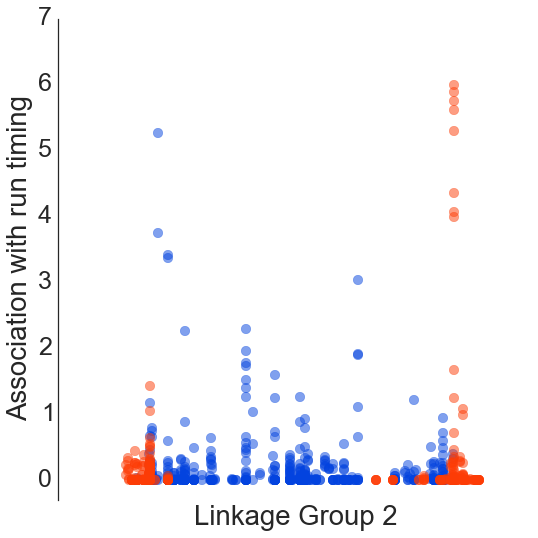

In [28]:
sns.set(font_scale=2.5, style = "white")
stat = 'mlog10(fdr_pval)_LFMM'
kws = dict(s=90, linewidth=.5, alpha = .5)

g = sns.FacetGrid(data = genome_stats[genome_stats['paper1_LG'] == 2], sharex=False, hue_kws=dict(marker=["o", 'o']),
           size = 8, aspect = 1, palette=sns.xkcd_palette(reversed(colors)), hue = 'paralog')
g = (g.map(plt.scatter, 'cM_padded', 'mlog10(fdr_pval)_LFMM', **kws))

g.set(ylim = -.3)
g.set(xticks=[], xticklabels = np.arange(1, 38))
g.set_axis_labels('Linkage Group 2', 'Association with run timing')
sns.despine(left=False, bottom = True)
    
#plt.savefig(os.path.join('paper', 'figures', 'supplemental', 'LFMM_dom_LG2.png'))
plt.show()

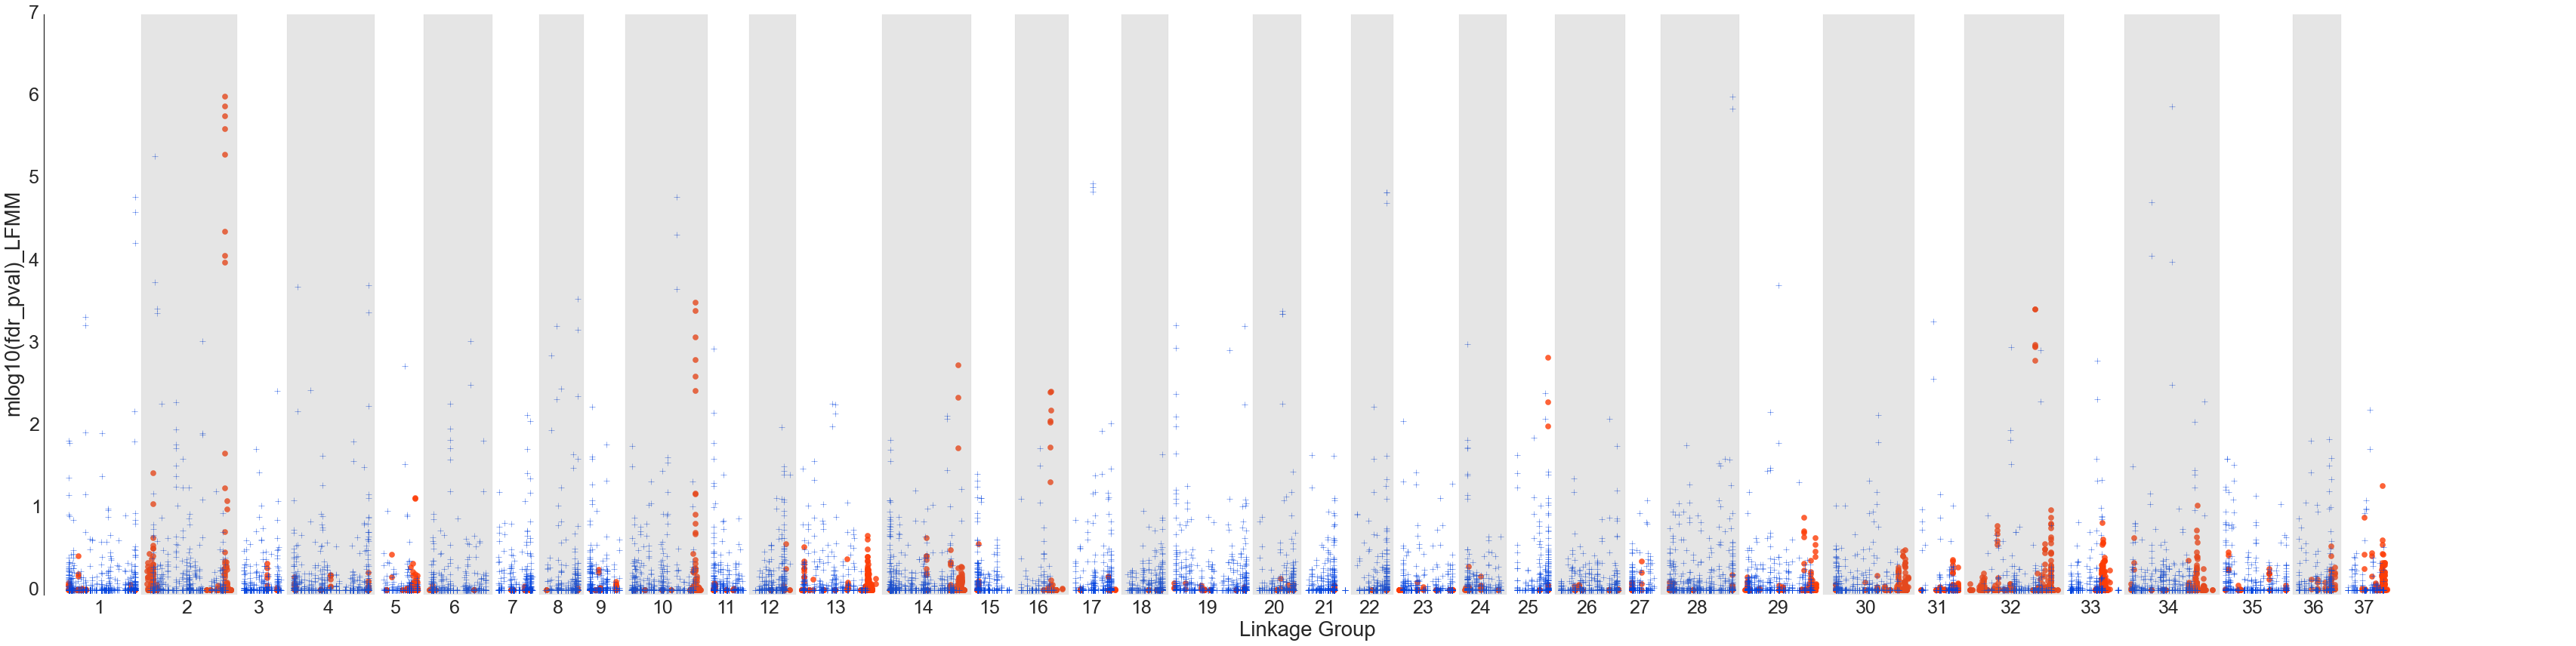

In [29]:
sns.set(font_scale=2.5, style = "white")
stat = 'mlog10(fdr_pval)_LFMM'
kws = dict(s=50, linewidth=.5, alpha = .8)


g = sns.FacetGrid(data = genome_stats, sharex=False, hue_kws=dict(marker=["o", '+']),
           size = 12, aspect = 4, palette=sns.xkcd_palette(colors), hue = 'paralog')
g = (g.map(plt.scatter, 'cM_padded', 'mlog10(fdr_pval)_LFMM', **kws))

g.set(xlim=-40, ylim = -.05)
g.set(xticks=cumpos['cM_pad'][:37]-15 + np.diff(cumpos['cM_pad'])/2, xticklabels = np.arange(1, 38))
g.set_axis_labels('Linkage Group', stat)
sns.despine(left=False, bottom = True)

currentLG = 1
for idx, LG_box_left in enumerate(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values[:36]):
    box_width = np.diff(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values)[idx]
    if currentLG%2 == 0:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((LG_box_left-10, -5),  box_width, 20, alpha = .2, color = 'gray'))
    currentLG+=1

## Informativeness

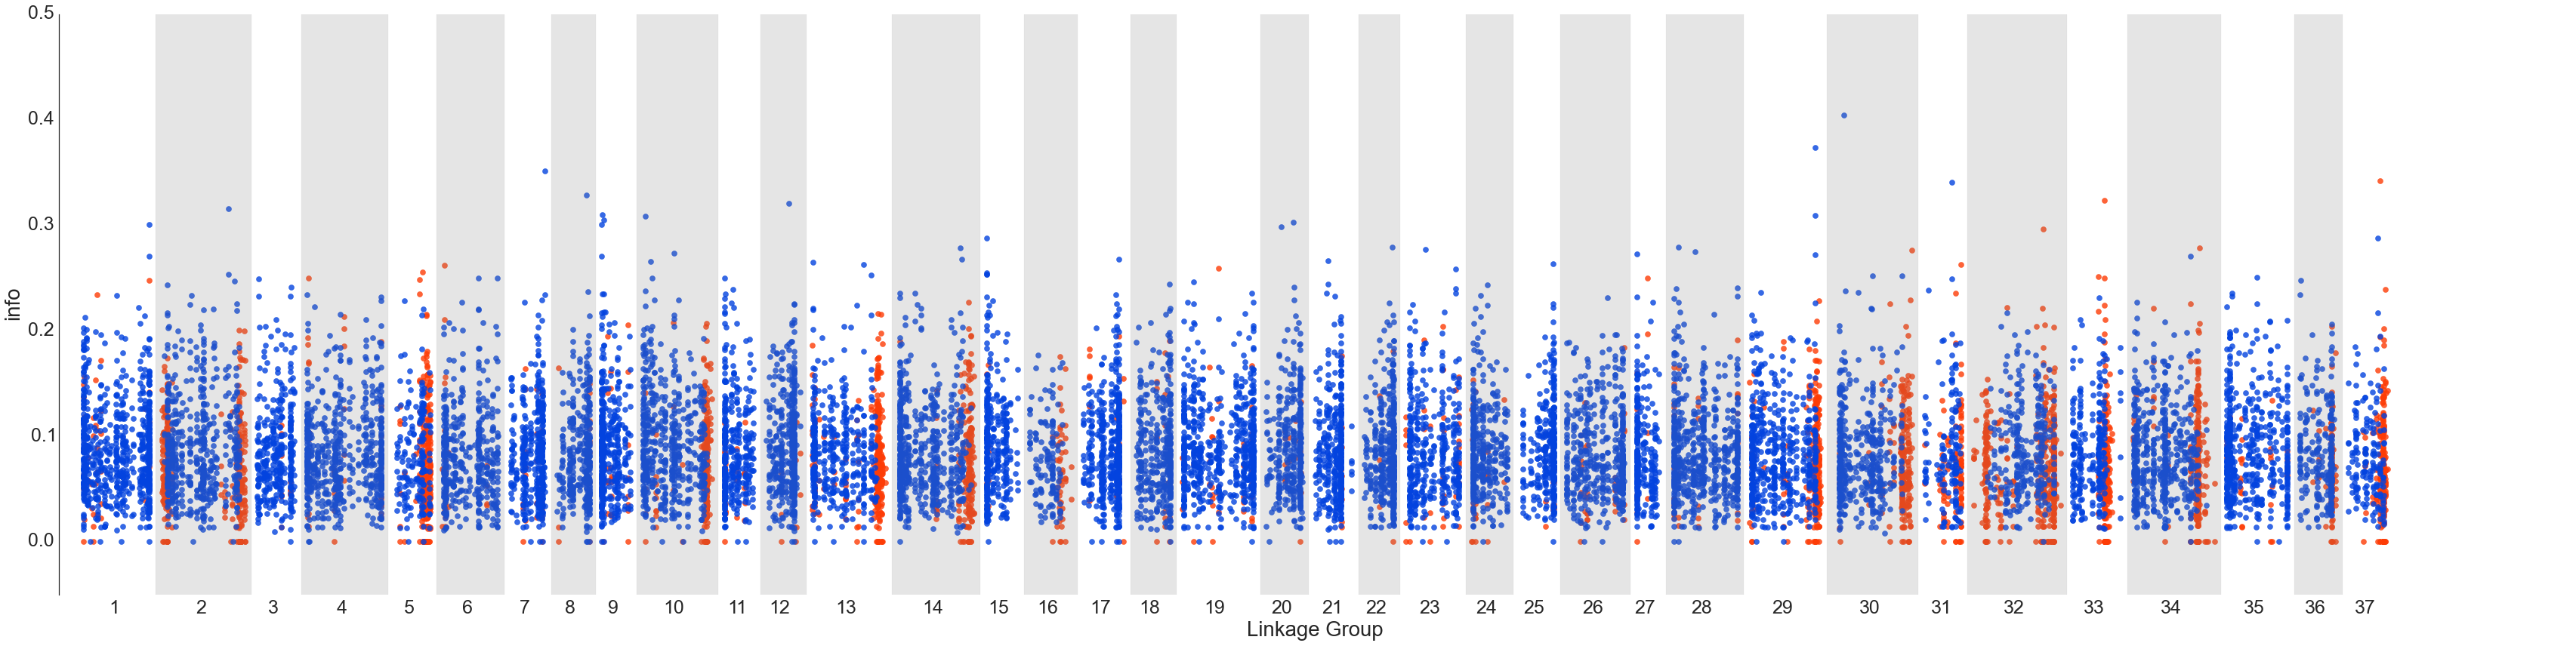

In [30]:
sns.set(font_scale=2.5, style = "white")
stat = 'info'
kws = dict(s=50, linewidth=.5, alpha = .8)


g = sns.FacetGrid(data = genome_stats, sharex=False, hue_kws=dict(marker=["o", 'o']),
           size = 12, aspect = 4, palette=sns.xkcd_palette(colors), hue = 'paralog')
g = (g.map(plt.scatter, 'cM_padded', stat, **kws))

g.set(xlim=-40, ylim = -.05)
g.set(xticks=cumpos['cM_pad'][:37]-15 + np.diff(cumpos['cM_pad'])/2, xticklabels = np.arange(1, 38))
g.set_axis_labels('Linkage Group', stat)
sns.despine(left=False, bottom = True)

currentLG = 1
for idx, LG_box_left in enumerate(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values[:36]):
    box_width = np.diff(genome_stats.groupby('paper1_LG')['cM_pad'].mean().values)[idx]
    if currentLG%2 == 0:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((LG_box_left-10, -5),  box_width, 20, alpha = .2, color = 'gray'))
    currentLG+=1

In [35]:
genome_stats[genome_stats['paralog'] == True]['info'].mean()

0.07350865047258263

In [36]:
genome_stats[genome_stats['paralog'] == False]['info'].mean()

0.08647981024206945

In [ ]:
### Look at the raw (dominance) genotypes

In [ ]:
## load the lfmm file and env file

In [ ]:
lfmm_dom_in = pd.read_csv(os.path.join('results','batch_4','LFMM','complete.dom.lfmm'),sep = ' ', header = None)
lfmm_dom_in.columns = [x+1 for x in lfmm_dom_in.columns]
lfmm_dom_in.head()

In [ ]:
lfmm_assess = lfmm_dom_in.replace('9', np.nan)

In [ ]:
sns.distplot(lfmm_assess.sum(axis = 0)/174)

In [ ]:
##

In [ ]:
(lfmm_assess.sum(axis = 0)/174 > .05) & (lfmm_assess.sum(axis = 0)/174 < .95)

In [ ]:
genome_stats.sort_values(['paralog', 'mlog10(fdr_pval)_LFMM'], ascending=False)[:8]

In [ ]:
lfmm_subset = lfmm_dom_in[genome_stats.sort_values(['paralog', 'mlog10(fdr_pval)_LFMM'], ascending=False)[:8]['LFMM_ID'].tolist()].copy()
lfmm_subset['env'] = env['env']
lfmm_subset = lfmm_subset.replace(9, np.nan).dropna()
lfmm_subset.tail()

In [ ]:
lfmm_subset.groupby('env').mean()

In [ ]:
genome_stats.sort_values(['paralog', 'mlog10(fdr_pval)_LFMM'], ascending=False)[:8]['LFMM_ID'].tolist()

In [ ]:
lfmm_dom_in.T.head()

In [ ]:
env = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/LFMM/basic.env', header = None)
env.columns = ['env']
env.head()

In [ ]:
genome_stats.head()

In [ ]:
assert False

In [ ]:
pop_fst = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes/non_paralogs.fst', sep= '\t')
pop_fst.rename(columns = {'SNP':'stacks_SNP'}, inplace=True)
pop_fst.head()

In [ ]:
lfmm_map = pd.merge(lfmm_map, pop_fst, left_on='stacksID', right_on='stacks_SNP')

In [ ]:
linkage_map = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/final/PS_chum_map_2015.txt',sep = '\t')
linkage_map.head()

In [ ]:
mapped_lfmm = pd.merge(linkage_map, lfmm_map, left_on='stacks_SNP', right_on='stacksID', how = 'right')
mapped_lfmm.shape

In [ ]:
mapped_lfmm = mapped_lfmm.sort(columns=['paper1_LG', 'cM'])
mapped_lfmm['manhattan_order'] = range(1, len(mapped_lfmm)+1)
mapped_lfmm.head()

In [ ]:
mapped_lfmm.to_csv(os.path.join('results','batch_4','LFMM', 'mapped_lfmm.txt'), index = False, sep = '\t')

# Plots

In [ ]:
sns.distplot(lfmm['mlog10val'])
plt.show()
sns.distplot(mapped_lfmm['mlog10val'])
plt.show()

In [ ]:
plt.scatter(x =mapped_lfmm['FST'] , y =mapped_lfmm['mlog10val'], alpha = .2)

In [ ]:
g = sns.lmplot(data = mapped_lfmm, x = 'manhattan_order', y = 'mlog10val', fit_reg=False, hue = 'plinkLG', sharex=False,
           legend= False, size = 5, aspect = 4, truncate = True,           palette="Set2")
g.set(xlim=0)
sns.despine(left=True)

In [ ]:
g = sns.lmplot(data = mapped_lfmm, x = 'manhattan_order', y = 'FST', fit_reg=False, hue = 'plinkLG', sharex=False,
           legend= False, size = 5, aspect = 4, truncate = True,           palette="Set2")
g.set(xlim=0)
sns.despine(left=True)

In [ ]:
g = sns.lmplot(data = mapped_lfmm, x = 'manhattan_order', y = 'mlog10val', fit_reg=False, hue = 'reject_null', sharex=False,
           legend= False, size = 5, aspect = 4, truncate = True,           palette="Set2")
g.set(xlim=-1)
sns.despine(left=True)

In [ ]:
#figsize(10,10)
g = sns.lmplot(data = mapped_lfmm, x = 'cM', y = 'mlog10val', fit_reg=False, row = 'plinkLG', hue = 'reject_null', sharex=False,
           legend= False, size = 5, aspect = 2, 
           palette="Set2")
g.set(xlim=-1)
sns.despine(left=True)

In [ ]:
#figsize(10,10)
g = sns.lmplot(data = mapped_lfmm, x = 'cM', y = 'FST', fit_reg=False, row = 'plinkLG', hue = 'reject_null', sharex=False,
           legend= False, size = 5, aspect = 2, 
           palette="Set2")
g.set(xlim=-1)
sns.despine(left=True)